NaiveBayes.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  yp['pi'] = pi
/Users/lfawaz/miniconda2/envs/python27/lib/python2.7/site-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
NaiveBayes.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  xp['m'] = post_m
NaiveBayes.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Confusion Matrix: 
Accuracy:  0.932697137117
Image:  0
0    0.264645
1    0.735355
Name: 40, dtype: float64
Image:  1
0    0.480633
1    0.519367
Name: 42, dtype: float64
Image:  2
0    0.273412
1    0.726588
Name: 55, dtype: float64
[0    -1.513100
1    -3.392000
2     0.598390
3     0.062949
4     0.501970
5     0.107790
6    -1.045000
7     1.666400
8     1.192800
9     1.252400
10   -1.085800
11   -1.390000
12   -0.474470
13   -1.095400
14   -0.301540
Name: 822, dtype: float64, 0     3.71730
1     0.21544
2    -2.89960
3    -2.77490
4     0.78044
5    -0.43193
6     2.10660
7     1.98000
8     0.36632
9     1.11770
10    2.10440
11    1.43410
12   -0.62221
13   -1.30610
14   -0.31907
Name: 1130, dtype: float64, 0    -2.497900
1     0.712080
2    -0.052289
3     1.135200
4     1.708600
5    -0.514350
6     1.111900
7     2.443000
8     0.182720
9     1.805200
10    0.253760
11   -0.391550
12   -1.063500
13    0.776270
14    0.163840
Name: 357, dtype: float64]
Image:  0
0       0.500

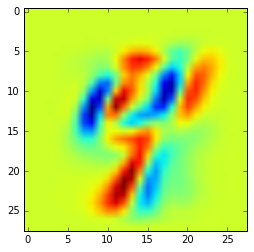

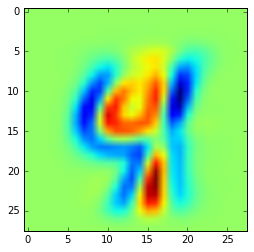

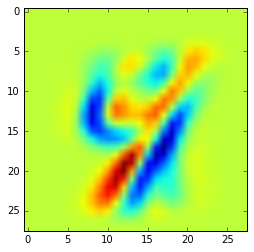

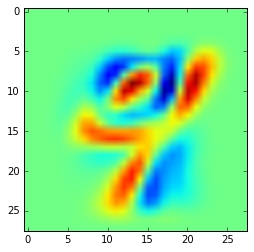

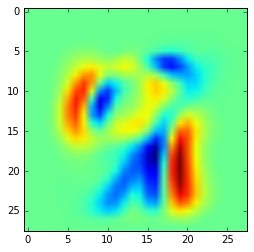

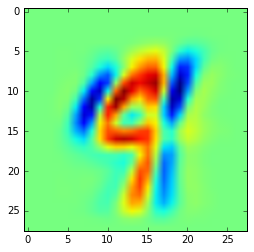

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from NaiveBayes import StudenttNB
%matplotlib inline


def calculateAccuracy(matrix):
    matrix = matrix.astype(float)
    return np.trace(matrix)/np.sum(matrix)
    
def showImage(Q,vector):
    image = Q.dot(vector).reshape(28,28)
    plt.figure()
    plt.imshow(image)


def missClassifyIndex(n,Ytest,Ypred): 
    Ytest_pred = pd.concat([Ytest,Ypred],axis=1)
    Ytest_pred.columns = ['Ytest','Ypred']
    Ytest_pred['missed'] = abs(Ytest_pred['Ytest'] - Ytest_pred['Ypred'])
    return Ytest_pred[Ytest_pred["missed"] == 1].head(n=n).index.tolist()

def ambiguousPredictions(n,Yproba):
    Yproba["diff"] = abs(Yproba[0] - Yproba[1])
    return Yproba.sort(["diff"],ascending=1).head(n=n).index.tolist()
    
def getImages(indexes,Xtest,Yproba):
    images = []
    proba = []
    for i in range(len(indexes)):
        idx = indexes[i]
        images.append(Xtest.iloc[idx])
        proba.append(Yproba.iloc[idx])
    return images, proba

def main():
    #Load Data
    Xtrain = pd.read_csv("./hw2_data_csv/Xtrain.csv",header=None)
    Xtest = pd.read_csv("./hw2_data_csv/Xtest.csv",header=None)
    Ytrain = pd.read_csv("./hw2_data_csv/Ytrain.csv",header=None)
    Ytest = pd.read_csv("./hw2_data_csv/Ytest.csv",header=None)
    Q =  pd.read_csv("./hw2_data_csv/Q.csv",header=None)
    
    #Load Model
    model = StudenttNB(Xtrain,Ytrain)
    
    #train Model
    model.fit()
    
    #predictions
    Ypred = pd.DataFrame(model.predict(Xtest))
    
    #probabilities
    Yproba = pd.DataFrame(model.predict_proba(Xtest))
    
    #confusion matrix
    conf_matrix = confusion_matrix(Ytest,Ypred)
    
    #accuracy 
    accuracy = calculateAccuracy(conf_matrix)
    
    #miss classified images
    mis_images, mis_proba = getImages(missClassifyIndex(3,Ytest,Ypred),Xtest,Yproba)
    
    #ambigous images
    amb_images, amb_proba = getImages(ambiguousPredictions(3,Yproba),Xtest,Yproba)
    
    print "Confusion Matrix: "
    print "Accuracy: ", accuracy
 
    for i in range(len(mis_images)):
        print "Image: " , i
        print mis_proba[i]
        showImage(Q,mis_images[i])
    
    print amb_images
    for j in range(len(amb_images)):
        print "Image: ", j
        print amb_proba[j]
        showImage(Q,amb_images[j])
        
if __name__ == "__main__":
    main()